## Modeling_WNV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
final_df = pd.read_csv('../clean_data/final_df.csv')
final_df.head()

,AddressAccuracy,NumMosquitos,WnvPresent,Dist_St2,Station,PrecipTotal,ResultSpeed,ResultDir,AvgSpeed,Tvaglag1,Tvaglag2,Tvaglag3,Tvaglag4,PTotallag1,PTotallag2,PTotallag3,PTotallag4
0,8.0,1.0,0.0,15.4851,2,0.17,15.4,34,16.3,59.0,59.0,55.0,54.0,0.09,0.15,0.02,0.000
1,8.0,1.0,0.0,13.9728,2,0.23,6.4,15,7.2,72.0,73.0,72.0,73.0,0.00,0.00,0.00,0.190
2,9.0,13.0,0.0,13.1471,2,0.00,4.7,13,5.8,78.0,74.0,74.0,77.0,0.00,0.00,0.00,0.001
3,9.0,50.0,0.0,23.9146,1,0.00,7.6,30,7.8,69.0,66.0,69.0,86.0,0.50,0.04,0.00,0.001
4,8.0,1.0,0.0,20.7030,1,0.16,7.0,1,11.9,77.0,76.0,71.0,80.0,1.55,0.11,0.00,0.000


In [4]:
y = final_df['WnvPresent']
X = final_df.drop(columns = 'WnvPresent')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Model 1: Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
lr = LogisticRegression()

In [8]:
lr.fit(X_train, y_train)

/Users/skarki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred = lr.predict(X_test)

In [10]:
score = lr.score(X_test, y_test)
print(score)

0.7142857142857143


In [11]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[144  53]
 [ 51 116]]


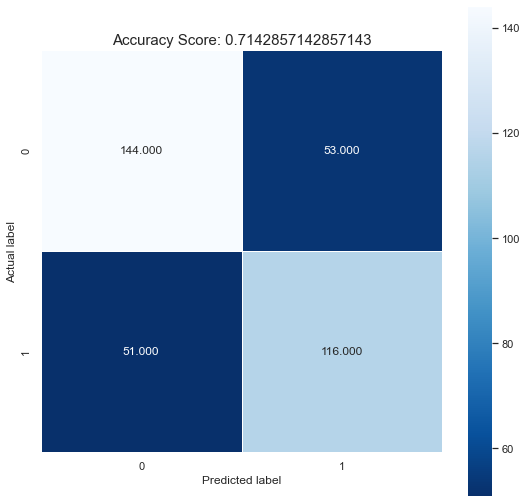

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.712787622724095

## Model 2: Random Forest 

In [14]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

In [15]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [16]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [17]:
y_pred_rf = rf.predict(X_test)

In [18]:
score = rf.score(X_test, y_test)
print(score)

0.3235213570087727


In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf)
metrics.auc(fpr, tpr)

0.8302076050943799

## Model 3: Decision Tree

In [20]:
from sklearn import tree

In [21]:
dtree = tree.DecisionTreeClassifier()

In [22]:
dtree = dtree.fit(X_train, y_train)

In [23]:
y_pred_dt = dtree.predict(X_test)

In [24]:
score = dtree.score(X_test, y_test)
print(score)

0.717032967032967


In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dt)
metrics.auc(fpr, tpr)

0.7189732210705493